# Mariprism Plotting Features


### Here we show the plotting functions available on Mariprism!

In [8]:
# Import general
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.patches as patches
import matplotlib.cbook as cbook


# Import local
sys.path.append( '../mariprism' )
from _maricolors_dict import FLOWER_BLOSSOM, FLOWER_RAD, ICY_FLOWER
from _maricolors_dict import GAS_FILAMENTS, FOREST_TROPICAL, SUCULENT_GARDEN 
from _maricolors_dict import mari_BLUES, mari_PURPLES

# import galaxy shapes
sys.path.append( '../galaxy_shapes' )

import _mariplotting as mariplt

### 1. Radial plot example

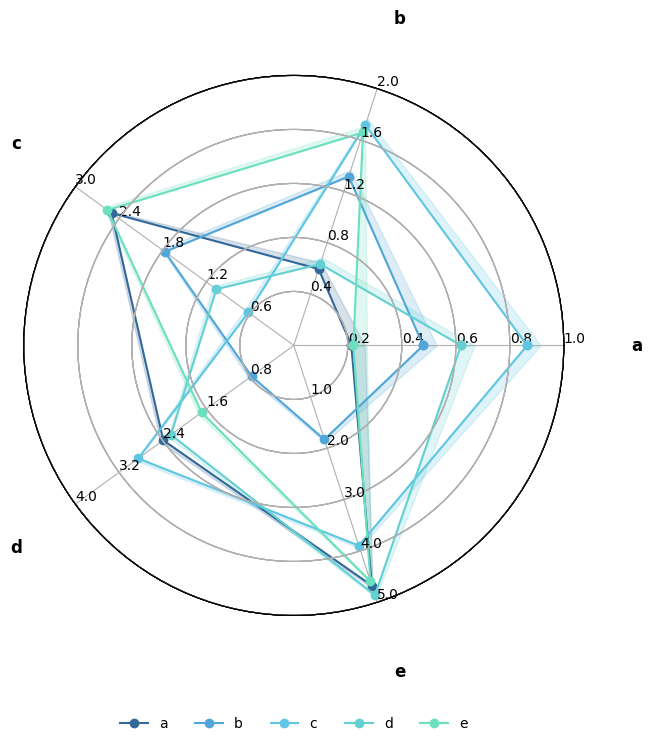

In [14]:
names_param   = ['a','b','c','d','e']      
ranges = [(0,1),(0,2),(0,3),(0,4),(0,5)]
angles = np.linspace(0,360,len(names_param))

marimap_dict = mari_BLUES
marimap_keys = list(marimap_dict.keys())

fig1 = plt.figure(figsize=(6, 6))
radar = mariplt.plot_radar(fig1, names_param, ranges)

for i in range(len(names_param)):

    val1 = np.random.random()
    val2 = np.random.random()*2
    val3 = np.random.random()*3
    val4 = np.random.random()*4
    val5 = np.random.random()*5
    val_array = np.array([val1, val2, val3, val4, val5])

    maricolor_i = marimap_dict[str(marimap_keys[i+1])]
    
    radar.plot(val_array, 'o-', color=maricolor_i, label=names_param[i])
    radar.fill_between(val_array,val_array+0.05, color=maricolor_i, alpha=0.2)
    
radar.ax.legend(loc='center', bbox_to_anchor=(0.5, -0.20),frameon=False, ncol=len(names_param))
plt.show()

### 2. Galaxies type plot

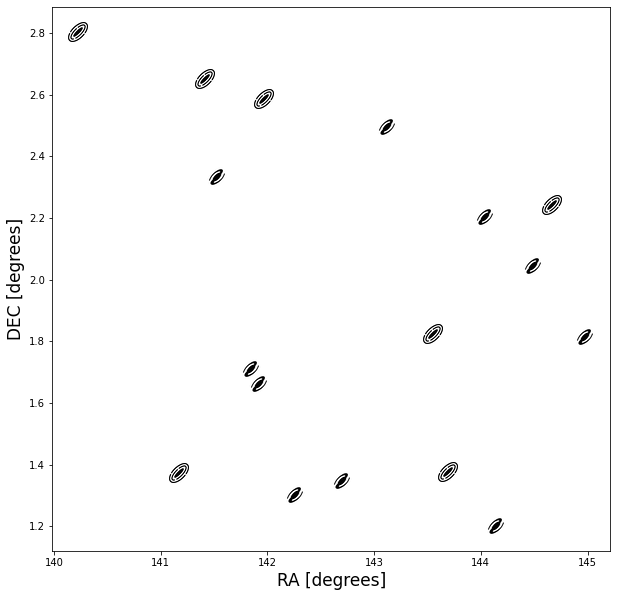

In [88]:
path = '../galaxy_shapes/spiral_bw_1.png'
path2 = '../galaxy_shapes/elliptical_bw.png'

spiral_image = plt.imread(path)
elliptical_image = plt.imread(path2)

ra_sp = [random.uniform(140, 145) for i in range(10)]
dec_sp = [random.uniform(1, 3) for i in range(10)]

ra_el = [random.uniform(140, 145) for i in range(7)]
dec_el = [random.uniform(1, 3) for i in range(7)]

fig, ax = plt.subplots(figsize=(10,10))

def plot_images(x, y, image, ax=None):
    """
    source : https://stackoverflow.com/questions/2318288/how-to-use-custom-png-image-marker-with-plot
    
    """
    ax = ax or plt.gca()

    for xi, yi in zip(x,y):
        im = OffsetImage(image, zoom=72/ax.figure.dpi)
        im.image.axes = ax

        ab = AnnotationBbox(im, (xi,yi), frameon=False, pad=0.0,)

        ax.add_artist(ab)

plot_images(ra_sp,dec_sp, spiral_image, ax=ax)
ax.plot(ra_sp, dec_sp, linestyle='')

ax.plot(ra_el, dec_el, linestyle='')
plot_images(ra_el,dec_el, elliptical_image, ax=ax)
plt.xlabel('RA [degrees]', fontsize=17)
plt.ylabel('DEC [degrees]', fontsize=17)
plt.show()